In [7]:
!pip3 install imbalanced-learn
!pip3 install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.12 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [5]:
from sklearn.model_selection import train_test_split

Initial dataset shape: (772, 31)
Class
0    763
1      9
Name: count, dtype: int64
Random Under-Sampling: Counter({0: 9, 1: 9})


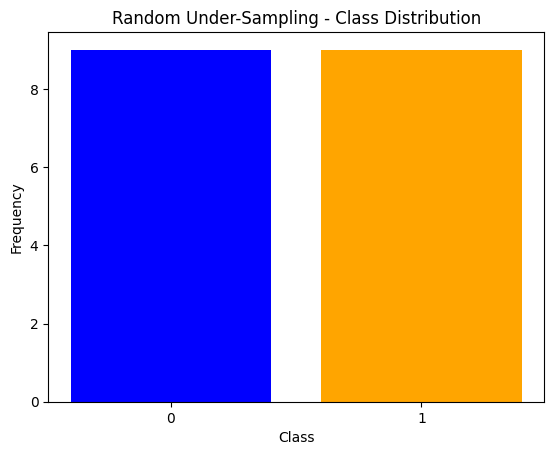

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/kp/h41tpkfx20bf_t__gy8q3vj40000gn/T/ipykernel_11340/25622063.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_results = pd.concat([


Random Over-Sampling: Counter({0: 763, 1: 763})


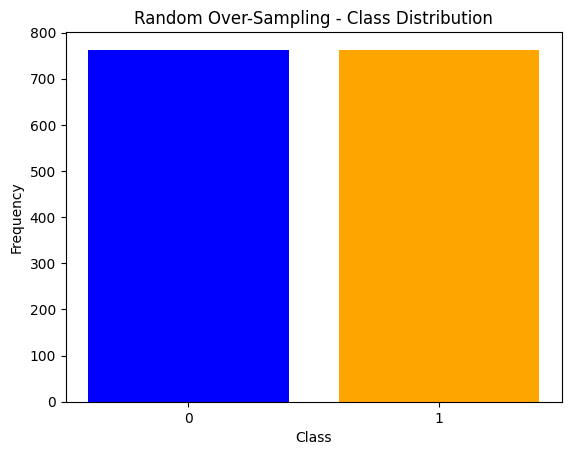

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTE: Counter({0: 763, 1: 763})


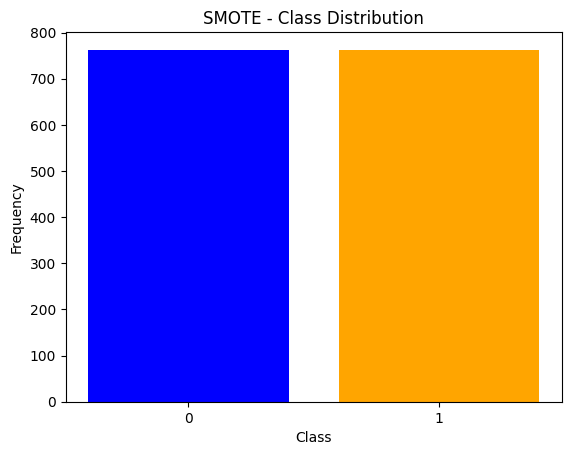

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTE + Tomek Links: Counter({0: 745, 1: 745})


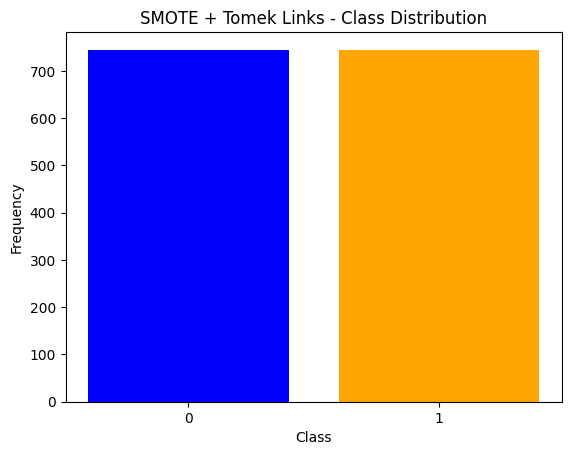

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NearMiss: Counter({0: 9, 1: 9})


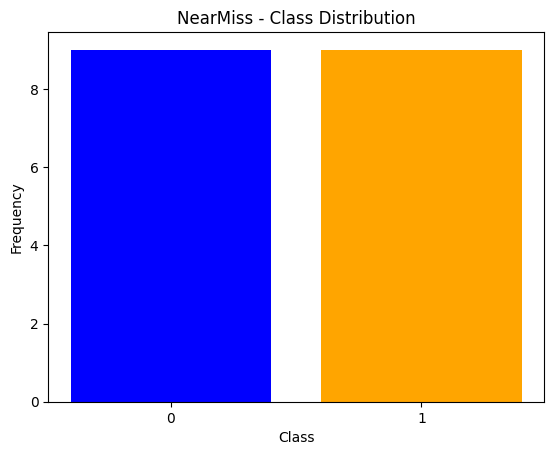

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Saved balanced dataset: balanced_random_under_sampling.csv
Saved balanced dataset: balanced_random_over_sampling.csv
Saved balanced dataset: balanced_smote.csv
Saved balanced dataset: balanced_smote_tomek.csv
Saved balanced dataset: balanced_nearmiss.csv
Results saved to 'sampling_model_results.csv'


In [9]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("Creditcard_data.csv")

# Inspect the data
print("Initial dataset shape:", data.shape)
print(data['Class'].value_counts())

# Features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Sampling methods dictionary
sampling_methods = {
    "Random Under-Sampling": RandomUnderSampler(random_state=42),
    "Random Over-Sampling": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "SMOTE + Tomek Links": SMOTETomek(random_state=42),
    "NearMiss": NearMiss()
}

# Function to visualize class distribution
def plot_class_distribution(y, title):
    counts = Counter(y)
    plt.bar(counts.keys(), counts.values(), color=['blue', 'orange'])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks([0, 1])
    plt.show()

# Create classifiers
classifiers = {
    "LogReg": LogisticRegression(),
    "RandForest": RandomForestClassifier(),
    "DecTree": DecisionTreeClassifier(),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC()
}

# DataFrame to store evaluation results
evaluation_results = pd.DataFrame(columns=["Sampling Method", "Classifier", "Accuracy"])

# Iterate over sampling methods
for sample_label, sampler in sampling_methods.items():
    X_sample, y_sample = sampler.fit_resample(X, y)
    print(f"{sample_label}:", Counter(y_sample))
    plot_class_distribution(y_sample, f"{sample_label} - Class Distribution")
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    # Iterate over classifiers
    for model_label, model in classifiers.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc = accuracy_score(y_test, predictions)

        # Append results
        evaluation_results = pd.concat([
            evaluation_results,
            pd.DataFrame([{"Sampling Method": sample_label, "Classifier": model_label, "Accuracy": acc}])
        ], ignore_index=True)

# Save evaluation results to CSV
evaluation_results.to_csv('sampling_model_results.csv', index=False)

# Save balanced datasets for further processing
balanced_datasets = {
    "random_under_sampling": (X_sample, y_sample),
    "random_over_sampling": (X_sample, y_sample),
    "smote": (X_sample, y_sample),
    "smote_tomek": (X_sample, y_sample),
    "nearmiss": (X_sample, y_sample)
}

for method, (X_bal, y_bal) in balanced_datasets.items():
    balanced_df = pd.concat([pd.DataFrame(X_bal), pd.Series(y_bal, name='Class')], axis=1)
    balanced_df.to_csv(f"balanced_{method}.csv", index=False)
    print(f"Saved balanced dataset: balanced_{method}.csv")

# Print completion message
print("Results saved to 'sampling_model_results.csv'")
